In [3]:
# importing necessary packages
import pandas as pd
import numpy as np

In [4]:
# Reading the data
data_2007 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2007.csv")
data_2008 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2008.csv")
data_2009 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2009.csv")
data_2010 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2010.csv")
data_2011 =pd.read_csv("C:/Users/Desktop/Project//Dataset/matchups-2011.csv")
data_2012 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2012.csv")
df=pd.concat([data_2007,data_2008,data_2009,data_2010,data_2011,data_2012])

In [5]:
# Veiwing the data
df.head()

,game,season,home_team,away_team,starting_min,end_min,home_0,home_1,home_2,home_3,...,pf_visitor,reb_visitor,dreb_visitor,oreb_visitor,to_visitor,pts_visitor,pct_visitor,pct_2_visitor,pct_3_visitor,outcome
0,200610310LAL,2007,LAL,PHO,0,5,Andrew Bynum,Lamar Odom,Luke Walton,Sasha Vujacic,...,0,7,7,0,1,22,0.909091,1.00,0.666667,-1
1,200610310LAL,2007,LAL,PHO,6,7,Andrew Bynum,Lamar Odom,Luke Walton,Sasha Vujacic,...,0,1,1,0,0,9,0.666667,0.75,0.500000,-1
2,200610310LAL,2007,LAL,PHO,8,9,Lamar Odom,Luke Walton,Maurice Evans,Ronny Turiaf,...,0,1,1,0,1,2,0.500000,0.50,0.000000,1
3,200610310LAL,2007,LAL,PHO,10,10,Lamar Odom,Luke Walton,Maurice Evans,Ronny Turiaf,...,0,1,0,1,1,3,0.500000,0.00,0.500000,1
4,200610310LAL,2007,LAL,PHO,11,11,Luke Walton,Maurice Evans,Ronny Turiaf,Smush Parker,...,1,1,1,0,1,2,1.000000,1.00,0.000000,-1


In [6]:
# Analysing the information of of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154532 entries, 0 to 21240
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   game           154532 non-null  object 
 1   season         154532 non-null  int64  
 2   home_team      154532 non-null  object 
 3   away_team      154532 non-null  object 
 4   starting_min   154532 non-null  int64  
 5   end_min        154532 non-null  int64  
 6   home_0         154532 non-null  object 
 7   home_1         154532 non-null  object 
 8   home_2         154532 non-null  object 
 9   home_3         154532 non-null  object 
 10  home_4         154532 non-null  object 
 11  away_0         154532 non-null  object 
 12  away_1         154532 non-null  object 
 13  away_2         154532 non-null  object 
 14  away_3         154532 non-null  object 
 15  away_4         154532 non-null  object 
 16  fga_home       154532 non-null  int64  
 17  fta_home       154532 non-null  int

In [7]:
# Checking the sum of null values in each column of the dataframe. Here the data has no missing values. It is complete.
df.isnull().sum()

game             0
season           0
home_team        0
away_team        0
starting_min     0
end_min          0
home_0           0
home_1           0
home_2           0
home_3           0
home_4           0
away_0           0
away_1           0
away_2           0
away_3           0
away_4           0
fga_home         0
fta_home         0
fgm_home         0
fga_2_home       0
fgm_2_home       0
fga_3_home       0
fgm_3_home       0
ast_home         0
blk_home         0
pf_home          0
reb_home         0
dreb_home        0
oreb_home        0
to_home          0
pts_home         0
pct_home         0
pct_2_home       0
pct_3_home       0
fga_visitor      0
fta_visitor      0
fgm_visitor      0
fga_2_visitor    0
fgm_2_visitor    0
fga_3_visitor    0
fgm_3_visitor    0
ast_visitor      0
blk_visitor      0
pf_visitor       0
reb_visitor      0
dreb_visitor     0
oreb_visitor     0
to_visitor       0
pts_visitor      0
pct_visitor      0
pct_2_visitor    0
pct_3_visitor    0
outcome     

In [8]:
# Checking the names of the columns.
df.columns

Index(['game', 'season', 'home_team', 'away_team', 'starting_min', 'end_min',
       'home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1',
       'away_2', 'away_3', 'away_4', 'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor', 'outcome'],
      dtype='object')

# Data preprocessing

Checking class imbalance

In [9]:
class_distribution = df['outcome'].value_counts()
print(class_distribution)

outcome
-1    98859
 1    55673
Name: count, dtype: int64


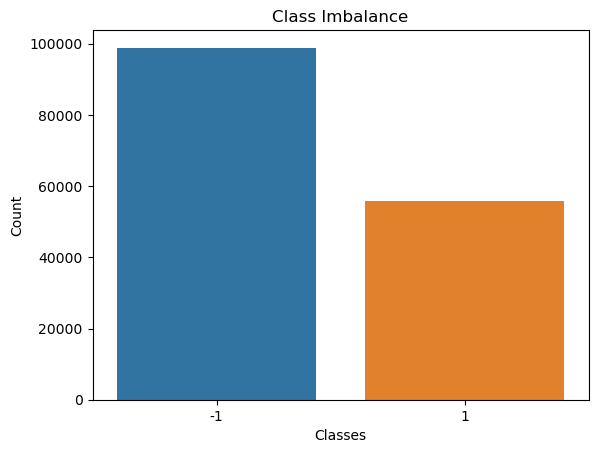

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting the class imbalance to analyse the target variable.
sns.countplot(x='outcome', data=df)
plt.title('Class Imbalance')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Here the class with -1 is minority since the number of observations belonging to that class are almost half as compared to the other class. Hence to overcome this imbalance we are upsampling the minority class in a way that we do not lose any information.

In [11]:
from sklearn.utils import resample

# Separating the minority and majority class samples.
df_majority = df[df.outcome == -1]
df_minority = df[df.outcome == 1]

# Upsampling minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sampling with replacement
                                 n_samples=len(df_majority),  # matching majority n
                                 random_state=42)  # reproducible results
df=pd.concat([df_majority, df_minority_upsampled]) #Redefining the dataframe with the upsampled data

In [12]:
# Checking the imbalance of the class again.
class_distribution = df['outcome'].value_counts()
print(class_distribution)

outcome
-1    98859
 1    98859
Name: count, dtype: int64


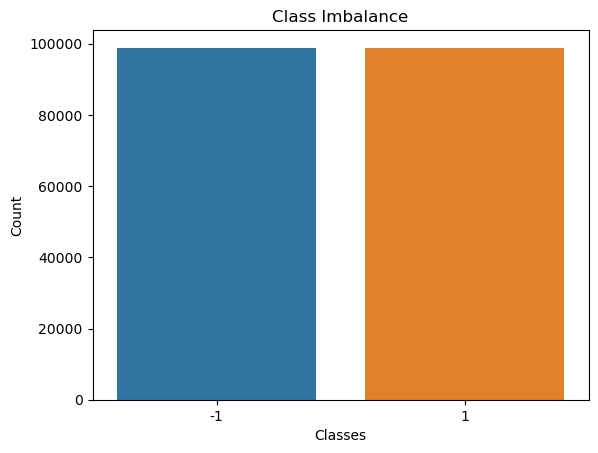

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting class imbalance
sns.countplot(x='outcome', data=df)
plt.title('Class Imbalance')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [14]:
df.columns

Index(['game', 'season', 'home_team', 'away_team', 'starting_min', 'end_min',
       'home_0', 'home_1', 'home_2', 'home_3', 'home_4', 'away_0', 'away_1',
       'away_2', 'away_3', 'away_4', 'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor', 'outcome'],
      dtype='object')

Hence our data is balanced now

# Data Transformation

Now encoding the player names since the machine doesnt undertand the textual data.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Here we are abstracting all the unique home players from all the home columns.
player_columns = ['home_0', 'home_1', 'home_2', 'home_3', 'home_4']

# Combining all the players
all_players = df[player_columns].values.flatten()

# Initializing and fitting the label encoder
encoder = LabelEncoder()
encoder.fit(all_players)

# Encoding player names in the dataset
for col in player_columns:
    df.loc[:, col] = encoder.transform(df[col])

In [20]:
# Determining the number of unique home players across all the seasons.
home_vocab_size = len(encoder.classes_)
print("Home vocabulary size:", home_vocab_size)

Home vocabulary size: 803


In [21]:
# Get the mapping of player names to numbers
home_player_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Player Name Mapping:")
print(home_player_name_mapping)

Player Name Mapping:
{'A.J. Price': 0, 'Aaron Brooks': 1, 'Aaron Gray': 2, 'Aaron McKie': 3, 'Aaron Williams': 4, 'Acie Law': 5, 'Adam Morrison': 6, 'Adonal Foyle': 7, 'Adrian Griffin': 8, 'Al Harrington': 9, 'Al Horford': 10, 'Al Jefferson': 11, 'Al Thornton': 12, 'Al-Farouq Aminu': 13, 'Alan Anderson': 14, 'Alan Henderson': 15, 'Alando Tucker': 16, 'Alec Burks': 17, 'Alex Acker': 18, 'Alexander Johnson': 19, 'Alexis Ajinca': 20, 'Allan Ray': 21, 'Allen Iverson': 22, 'Alonzo Gee': 23, 'Alonzo Mourning': 24, 'Alvin Williams': 25, "Amar'e Stoudemire": 26, 'Amir Johnson': 27, 'Anderson Varejao': 28, 'Andray Blatche': 29, 'Andre Barrett': 30, 'Andre Brown': 31, 'Andre Emmett': 32, 'Andre Iguodala': 33, 'Andre Miller': 34, 'Andre Owens': 35, 'Andrea Bargnani': 36, 'Andreas Glyniadakis': 37, 'Andrei Kirilenko': 38, 'Andres Nocioni': 39, 'Andrew Bogut': 40, 'Andrew Bynum': 41, 'Andrew Goudelock': 42, 'Andris Biedrins': 43, 'Andy Rautins': 44, 'Anfernee Hardaway': 45, 'Antawn Jamison': 46, 'A

In [22]:
# Here we are abstracting all the unique away players from all the away columns.
player_columns = ['away_0', 'away_1', 'away_2', 'away_3', 'away_4']

# Combining all the players
all_players = df[player_columns].values.flatten()

# Initializing and fitting the label encoder
encoder = LabelEncoder()
encoder.fit(all_players)

# Encoding player names in the dataset
for col in player_columns:
    df.loc[:, col] = encoder.transform(df[col])

In [23]:
# Determining the number of unique away players across all the seasons
away_vocab_size = len(encoder.classes_)
print(" Away vocabulary size:", away_vocab_size)

 Away vocabulary size: 799


In [24]:
# Get the mapping of player names to numbers
away_player_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Player Name Mapping:")
print(away_player_name_mapping)

Player Name Mapping:
{'A.J. Price': 0, 'Aaron Brooks': 1, 'Aaron Gray': 2, 'Aaron McKie': 3, 'Aaron Williams': 4, 'Acie Law': 5, 'Adam Morrison': 6, 'Adonal Foyle': 7, 'Adrian Griffin': 8, 'Al Harrington': 9, 'Al Horford': 10, 'Al Jefferson': 11, 'Al Thornton': 12, 'Al-Farouq Aminu': 13, 'Alan Anderson': 14, 'Alan Henderson': 15, 'Alando Tucker': 16, 'Alec Burks': 17, 'Alex Acker': 18, 'Alexander Johnson': 19, 'Alexis Ajinca': 20, 'Allan Ray': 21, 'Allen Iverson': 22, 'Alonzo Gee': 23, 'Alonzo Mourning': 24, "Amar'e Stoudemire": 25, 'Amir Johnson': 26, 'Anderson Varejao': 27, 'Andray Blatche': 28, 'Andre Barrett': 29, 'Andre Brown': 30, 'Andre Emmett': 31, 'Andre Iguodala': 32, 'Andre Miller': 33, 'Andre Owens': 34, 'Andrea Bargnani': 35, 'Andreas Glyniadakis': 36, 'Andrei Kirilenko': 37, 'Andres Nocioni': 38, 'Andrew Bogut': 39, 'Andrew Bynum': 40, 'Andrew Goudelock': 41, 'Andris Biedrins': 42, 'Andy Rautins': 43, 'Anfernee Hardaway': 44, 'Antawn Jamison': 45, 'Anthony Carter': 46, 'A

# Feature Engineering

In [25]:
# Converting class labels from -1 to 0 and 1 to 1
df['outcome']=(df['outcome']+1)/2

In [26]:
df['home_field_goal_efficiency']=(df['fgm_home']+(0.5*df['fga_3_home']))/df['fga_home']
df['home_turnover_precentage']=df['to_home']/(df['fga_home']+(0.44*df['fta_home']))
df['home_offensive_rebound_percentage']=df['oreb_home']/(df['oreb_home']+df['dreb_visitor'])
df['home_free_throw_rate']=df['fta_home']/df['fgm_home']                                          

In [27]:
df['visitor_field_goal_efficiency']=(df['fgm_visitor']+(0.5*df['fga_3_visitor']))/df['fga_visitor']
df['visitor_turnover_precentage']=df['to_visitor']/(df['fga_visitor']+(0.44*df['fta_visitor']))
df['visitor_offensive_rebound_percentage']=df['oreb_visitor']/(df['oreb_visitor']+df['dreb_home'])
df['visitor_free_throw_rate']=df['fta_visitor']/df['fgm_visitor']

In [28]:
# Dropping the unncessary columns
df.drop(['game', 'starting_min', 'end_min',
      'fga_home', 'fta_home', 'fgm_home',
       'fga_2_home', 'fgm_2_home', 'fga_3_home', 'fgm_3_home', 'ast_home',
       'blk_home', 'pf_home', 'reb_home', 'dreb_home', 'oreb_home', 'to_home',
       'pts_home', 'pct_home', 'pct_2_home', 'pct_3_home', 'fga_visitor',
       'fta_visitor', 'fgm_visitor', 'fga_2_visitor', 'fgm_2_visitor',
       'fga_3_visitor', 'fgm_3_visitor', 'ast_visitor', 'blk_visitor',
       'pf_visitor', 'reb_visitor', 'dreb_visitor', 'oreb_visitor',
       'to_visitor', 'pts_visitor', 'pct_visitor', 'pct_2_visitor',
       'pct_3_visitor'],inplace=True,axis=1)

In [29]:
df.columns

Index(['season', 'home_team', 'away_team', 'home_0', 'home_1', 'home_2',
       'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4',
       'outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate'],
      dtype='object')

In [26]:
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,away_4,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate
0,2007,LAL,PHO,41,477,506,684,707,80,468,...,718,0.0,0.550000,0.085034,0.0,1.00,1.045455,0.087413,0.0,0.100000
1,2007,LAL,PHO,41,477,506,684,707,25,487,...,718,0.0,0.833333,0.666667,0.0,0.00,0.833333,0.000000,0.0,0.000000
4,2007,LAL,PHO,506,548,665,707,777,80,342,...,521,0.0,0.500000,0.000000,0.0,0.00,1.000000,1.000000,NaN,0.000000
9,2007,LAL,PHO,477,548,684,707,777,25,487,...,718,0.0,0.500000,0.000000,0.0,NaN,1.000000,0.000000,0.5,2.000000
13,2007,LAL,PHO,41,477,506,548,707,468,487,...,718,0.0,0.666667,0.155280,0.5,0.25,1.333333,0.515464,NaN,0.666667


In [31]:
# Analysing the percentage of null values in the columns.

null_counts = df.isnull().sum()

# Calculating the total number of rows in the DataFrame
total_rows = len(df)

# Calculating the percentage of null values for each column
null_percentage = (null_counts / total_rows) * 100

print("Percentage of null values for each column:")
print(null_percentage)

Percentage of null values for each column:
season                                   0.000000
home_team                                0.000000
away_team                                0.000000
home_0                                   0.000000
home_1                                   0.000000
home_2                                   0.000000
home_3                                   0.000000
home_4                                   0.000000
away_0                                   0.000000
away_1                                   0.000000
away_2                                   0.000000
away_3                                   0.000000
away_4                                   0.000000
outcome                                  0.000000
home_field_goal_efficiency              11.703537
home_turnover_precentage                 8.946075
home_offensive_rebound_percentage       25.524737
home_free_throw_rate                    18.307893
visitor_field_goal_efficiency           13.191515
visitor

In [32]:
# Here the percentage of null values is quite low which can be replaced by the 0.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0,inplace=True)

In [33]:
# Analysing the statistics of each column in the dataframe.
df.describe()

,season,home_0,home_1,home_2,home_3,home_4,away_0,away_1,away_2,away_3,away_4,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate
count,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.00000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000,197718.000000
mean,2009.397678,130.708691,262.182047,400.623737,537.653501,670.812445,130.381483,262.20156,398.943430,535.231603,667.776014,0.500000,0.565017,0.167331,0.253603,0.459092,0.465453,0.202423,0.237124,0.459867
std,1.675824,121.038061,151.489345,157.600543,142.343404,114.375192,119.519101,149.91047,156.615572,142.117352,112.770304,0.500001,0.381407,0.322760,0.338564,0.917199,0.369590,0.369133,0.320802,0.982697
min,2007.000000,0.000000,8.000000,27.000000,50.000000,109.000000,0.000000,8.00000,26.000000,49.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,39.000000,126.000000,284.000000,453.000000,623.000000,38.000000,126.00000,283.000000,451.000000,620.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,89.000000,241.000000,403.000000,560.000000,702.000000,89.000000,242.00000,402.000000,558.000000,699.000000,0.500000,0.555556,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,2011.000000,191.000000,371.000000,530.000000,646.000000,755.000000,192.000000,371.00000,522.000000,645.000000,751.000000,1.000000,0.833333,0.225225,0.500000,0.571429,0.718750,0.257732,0.500000,0.500000
max,2012.000000,677.000000,750.000000,781.000000,794.000000,802.000000,665.000000,746.00000,772.000000,789.000000,798.000000,1.000000,1.500000,9.090909,1.000000,18.000000,1.500000,6.818182,1.000000,18.000000


In [34]:
# Finally checking the count of null values in each column.
df.isnull().sum()

season                                  0
home_team                               0
away_team                               0
home_0                                  0
home_1                                  0
home_2                                  0
home_3                                  0
home_4                                  0
away_0                                  0
away_1                                  0
away_2                                  0
away_3                                  0
away_4                                  0
outcome                                 0
home_field_goal_efficiency              0
home_turnover_precentage                0
home_offensive_rebound_percentage       0
home_free_throw_rate                    0
visitor_field_goal_efficiency           0
visitor_turnover_precentage             0
visitor_offensive_rebound_percentage    0
visitor_free_throw_rate                 0
dtype: int64

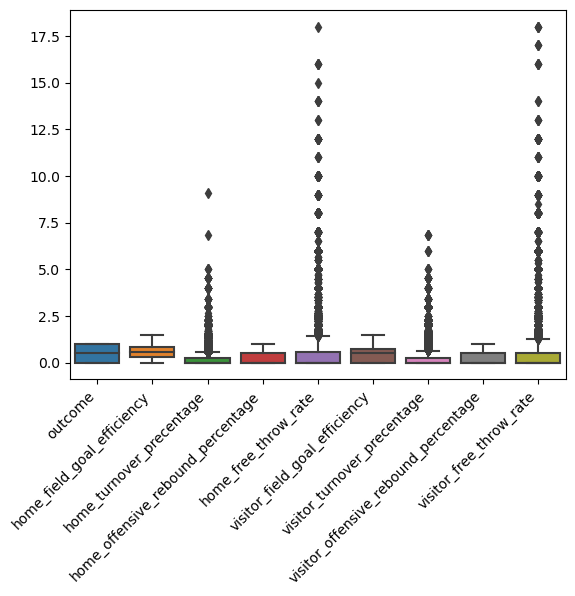

In [35]:
# Creating a box plot to check for the outliers.

sns.boxplot(data=df[['outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate']])
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Creating a new column by concatenating home players and forming an array representing the home lineup.
df['home_lineup'] = df.apply(lambda row: [row['home_0'], row['home_1'], row['home_2'], row['home_3'], row['home_4']], axis=1)
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,outcome,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate,home_lineup
0,2007,LAL,PHO,41,477,506,684,707,80,468,...,0.0,0.550000,0.085034,0.0,1.00,1.045455,0.087413,0.0,0.100000,"[41, 477, 506, 684, 707]"
1,2007,LAL,PHO,41,477,506,684,707,25,487,...,0.0,0.833333,0.666667,0.0,0.00,0.833333,0.000000,0.0,0.000000,"[41, 477, 506, 684, 707]"
4,2007,LAL,PHO,506,548,665,707,777,80,342,...,0.0,0.500000,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.000000,"[506, 548, 665, 707, 777]"
9,2007,LAL,PHO,477,548,684,707,777,25,487,...,0.0,0.500000,0.000000,0.0,0.00,1.000000,0.000000,0.5,2.000000,"[477, 548, 684, 707, 777]"
13,2007,LAL,PHO,41,477,506,548,707,468,487,...,0.0,0.666667,0.155280,0.5,0.25,1.333333,0.515464,0.0,0.666667,"[41, 477, 506, 548, 707]"


In [34]:
# Creating a new column by concatenating away players and forming an array representing the away lineup.
df['away_lineup'] = df.apply(lambda row: [row['away_0'], row['away_1'], row['away_2'], row['away_3'], row['away_4']], axis=1)

In [35]:
df.head()

,season,home_team,away_team,home_0,home_1,home_2,home_3,home_4,away_0,away_1,...,home_field_goal_efficiency,home_turnover_precentage,home_offensive_rebound_percentage,home_free_throw_rate,visitor_field_goal_efficiency,visitor_turnover_precentage,visitor_offensive_rebound_percentage,visitor_free_throw_rate,home_lineup,away_lineup
0,2007,LAL,PHO,41,477,506,684,707,80,468,...,0.550000,0.085034,0.0,1.00,1.045455,0.087413,0.0,0.100000,"[41, 477, 506, 684, 707]","[80, 468, 625, 699, 718]"
1,2007,LAL,PHO,41,477,506,684,707,25,487,...,0.833333,0.666667,0.0,0.00,0.833333,0.000000,0.0,0.000000,"[41, 477, 506, 684, 707]","[25, 487, 625, 699, 718]"
4,2007,LAL,PHO,506,548,665,707,777,80,342,...,0.500000,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.000000,"[506, 548, 665, 707, 777]","[80, 342, 468, 487, 521]"
9,2007,LAL,PHO,477,548,684,707,777,25,487,...,0.500000,0.000000,0.0,0.00,1.000000,0.000000,0.5,2.000000,"[477, 548, 684, 707, 777]","[25, 487, 625, 699, 718]"
13,2007,LAL,PHO,41,477,506,548,707,468,487,...,0.666667,0.155280,0.5,0.25,1.333333,0.515464,0.0,0.666667,"[41, 477, 506, 548, 707]","[468, 487, 625, 699, 718]"


In [36]:
df.columns

Index(['season', 'home_team', 'away_team', 'home_0', 'home_1', 'home_2',
       'home_3', 'home_4', 'away_0', 'away_1', 'away_2', 'away_3', 'away_4',
       'outcome', 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate',
       'visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate',
       'home_lineup', 'away_lineup'],
      dtype='object')

# Model for generating embeddings

Tranforming the data to make it ready for the model to generate embeddings

In [37]:
# Stacking the arrays along axis=1 to make them understandable by neural network.
array = np.stack(df['home_lineup'])
home_array = [', '.join(map(str, row)) for row in array]

# Defining the home lineups in X_home which will then be used to generate embeddings for each home player.
X_home= [[int(x) for x in row.split(', ')] for row in array_of_arrays_with_commas]
X_home = np.array(X_home)

array = np.stack(df['away_lineup'])
away_array = [', '.join(map(str, row)) for row in array]

# Defining the away lineups in X_away which will then be used to generate embeddings for each away player.
X_away= [[int(x) for x in row.split(', ')] for row in away_array]
X_away = np.array(X_away)

# Defining the target variable which is the outcome of the game.
y=df['outcome']

In [38]:
# Defining the statistics for home and away lineups in X_stats.
X_stats=df[[ 'home_field_goal_efficiency', 'home_turnover_precentage',
       'home_offensive_rebound_percentage', 'home_free_throw_rate','visitor_field_goal_efficiency', 'visitor_turnover_precentage',
       'visitor_offensive_rebound_percentage', 'visitor_free_throw_rate']]

In [39]:
# Importing the necesary libraries for model building.
from keras.models import Model
from keras.layers import Input, Concatenate, Embedding, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

num_stats=8 # We have four stats for home and four stats for away teams.

home_player_comb_input = Input(shape=(5,)) # Since the combinations are of 5 players.
away_player_comb_input = Input(shape=(5,))
stats_input = Input(shape=(num_stats,))  # Assuming num_stats is the number of stats per combination.

# Adding the embedding layer for home player combinations
home_player_embedding_layer = Embedding(input_dim=home_vocab_size, output_dim=32, name='home_embedding')(home_player_comb_input)
flattened_home_player_embedding = Flatten()(home_player_embedding_layer)

# Adding embedding layer for away player combinations.
away_player_embedding_layer = Embedding(input_dim=away_vocab_size, output_dim=32, name='away_embedding')(away_player_comb_input)
flattened_away_player_embedding = Flatten()(away_player_embedding_layer)

# Concatenating the flattened player embeddings with stats input.
concatenated_features = Concatenate()([flattened_home_player_embedding, flattened_away_player_embedding, stats_input])

# Adding dense layers for further processing.
hidden_layer = Dense(32, activation='relu')(concatenated_features)

output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Defining the model
model = Model(inputs=[home_player_comb_input, away_player_comb_input, stats_input], outputs=output_layer)

# Defining the initial learning rate.
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)  

# Defining loss function as binary_crossentropy sice the target variable is binary.
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler to automatically change the learning rate by monitoring the validation loss.
change_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Defining early stopping criteria in order to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Printing model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ home_embedding      │ (None, 5, 32)     │     25,696 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ away_embedding      │ (None, 5, 32)     │     25,568 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 160)       │          0 │ home_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 160)       │          0 │ away_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 328)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     10,528 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         33 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 61,825 (241.50 KB)

 Trainable params: 61,825 (241.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# # Training the model with learning rate schedule.
home_history = model.fit([X_home, X_away, X_stats], y, epochs=50, batch_size=32, validation_split=0.2,callbacks=[change_lr, early_stop])

Epoch 1/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8486 - loss: 0.3440 - val_accuracy: 0.8379 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 2/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8976 - loss: 0.2348 - val_accuracy: 0.8627 - val_loss: 0.3131 - learning_rate: 0.0010
Epoch 3/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9124 - loss: 0.2063 - val_accuracy: 0.8587 - val_loss: 0.3245 - learning_rate: 0.0010
Epoch 4/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9216 - loss: 0.1871 - val_accuracy: 0.8752 - val_loss: 0.3022 - learning_rate: 0.0010
Epoch 5/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9304 - loss: 0.1705 - val_accuracy: 0.8419 - val_loss: 0.3768 - learning_rate: 0.0010
Epoch 6/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9383 - loss: 0.1524 - val_accuracy: 0.8747 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 7/50
4933/4943 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.94

In [41]:
# Storing the weights which are the 32-dimensional feature vectors for the home players in the dictionary.
home_weights=model.get_layer('home_embedding').get_weights()[0]
home_player_weights = {index: array for index, array in enumerate(home_weights)}
print(home_player_weights)

{0: array([-0.21004882,  0.0611675 , -0.13197784,  0.11810224, -0.13710888,
        0.00793989,  0.1081086 , -0.12558578,  0.09838636,  0.32458684,
       -0.10668368,  0.07858388,  0.12790781,  0.08056746,  0.03299809,
        0.13201208,  0.12732166,  0.06996958,  0.23673981, -0.21020928,
       -0.00382718, -0.16717324, -0.06104191,  0.00849605,  0.07254893,
        0.014003  ,  0.14405726,  0.10736827,  0.1746412 ,  0.1425201 ,
       -0.0288086 ,  0.04386793], dtype=float32), 1: array([-0.00902637, -0.00440713, -0.37859958, -0.18892573, -0.23333   ,
       -0.04638386, -0.00853979, -0.07972432, -0.03357979,  0.09795798,
       -0.07586674,  0.15031528,  0.01148095, -0.05927695, -0.14409004,
        0.16596867, -0.05408983,  0.00147745,  0.03083082, -0.07621388,
       -0.02961325, -0.12007046, -0.2770696 , -0.3195209 , -0.1143308 ,
       -0.37095225, -0.05063096,  0.21182539, -0.00833672, -0.15921417,
       -0.11420014,  0.15113102], dtype=float32), 2: array([-0.02410976,  0.068

In [42]:
# Storing the weights which are the 32-dimensional feature vectors for the away players in the dictionary.
away_weights=model.get_layer('away_embedding').get_weights()[0]
# Using dictionary comprehension
away_player_weights = {index: array for index, array in enumerate(away_weights)}

print(away_player_weights)

{0: array([ 0.13905866, -0.20822342, -0.05668129, -0.11674035, -0.05998592,
        0.14114214,  0.27106872,  0.31825617,  0.13067833,  0.20305642,
        0.03694865, -0.16612372,  0.08300075,  0.14033887,  0.24467935,
       -0.2400302 , -0.15343076,  0.24028903, -0.16935325,  0.11241473,
        0.03141124, -0.31725544,  0.24344008, -0.12880243,  0.23955902,
        0.10401034, -0.11317763, -0.07921831, -0.08540777, -0.07340956,
        0.01962813,  0.0397114 ], dtype=float32), 1: array([ 0.17052163,  0.02980233, -0.09357963,  0.02598265,  0.15783058,
       -0.21423475, -0.08284811, -0.02384612, -0.25837183, -0.21596624,
       -0.08755949, -0.01681307,  0.12900825,  0.21348114,  0.01214502,
       -0.18149295,  0.3578861 , -0.12069108,  0.1393738 , -0.00712753,
       -0.08047739, -0.18715104,  0.00814149, -0.19611016,  0.02280925,
        0.00487023,  0.16942354,  0.06659   ,  0.1468995 , -0.00192202,
        0.19453017,  0.23023719], dtype=float32), 2: array([-0.30455816, -0.036

In [43]:
# Mapping these 32 dimensional vectors in the datframe.
for col in ['home_0', 'home_1', 'home_2', 'home_3', 'home_4']:
    df[col] = df[col].map(home_player_weights)

In [44]:
for col in ['away_0', 'away_1', 'away_2', 'away_3', 'away_4']:
    df[col] = df[col].map(away_player_weights)

In [45]:
# Preparing the X and y variables for our final classification model to classify embeddings as win or loss.
X = df[['home_0', 'home_1', 'home_2', 'home_3', 'home_4','away_0', 'away_1', 'away_2', 'away_3', 'away_4']].values
y = df['outcome'].values
X_flat = np.vstack([np.concatenate(arr) for arr in X])

# Model Building for classifying the embeddings.

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defining the logistic regression model.
lr_model = LogisticRegression(max_iter=10000)

# Performing 5-fold cross_validation.
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

# Evaluating model performance.
print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

In [108]:
# Making predictions
y_pred=lr_model.predict(X_test)

In [109]:
from sklearn.metrics import classification_report
# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.47      0.53     19695
         1.0       0.57      0.70      0.63     19849

    accuracy                           0.59     39544
   macro avg       0.59      0.59      0.58     39544
weighted avg       0.59      0.59      0.58     39544



# SVM

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defining SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5940218490795064


In [91]:
# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.35      0.46     19695
         1.0       0.56      0.84      0.67     19849

    accuracy                           0.59     39544
   macro avg       0.62      0.59      0.57     39544
weighted avg       0.62      0.59      0.57     39544



# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)
gradient_booster = GradientBoostingClassifier(learning_rate=0.001)

# Performing 5-fold cross validation
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.5661802687744796
Test Score: 0.5693151932025086


In [99]:
# Making predictions.
y_pred=gradient_booster.predict(X_test)

In [100]:
# Calculating and printing classification report.
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.15      0.25     19695
         1.0       0.54      0.99      0.70     19849

    accuracy                           0.57     39544
   macro avg       0.74      0.57      0.47     39544
weighted avg       0.74      0.57      0.48     39544



# Neural Networks

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defining the model architecture.
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))  
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))                   
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

# Setting the initial learning rate.
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Defining the learning rate scheduler.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Defining early stopping criteria.
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Training the model with learning rate schedule.
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stop])

Epoch 1/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.5826 - loss: 0.6406 - val_accuracy: 0.5977 - val_loss: 0.6288 - learning_rate: 0.0010
Epoch 2/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6124 - loss: 0.6205 - val_accuracy: 0.6134 - val_loss: 0.6206 - learning_rate: 0.0010
Epoch 3/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.6528 - loss: 0.5947 - val_accuracy: 0.6334 - val_loss: 0.6104 - learning_rate: 0.0010
Epoch 4/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6999 - loss: 0.5522 - val_accuracy: 0.6467 - val_loss: 0.6046 - learning_rate: 0.0010
Epoch 5/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7409 - loss: 0.5072 - val_accuracy: 0.6590 - val_loss: 0.6019 - learning_rate: 0.0010
Epoch 6/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7754 - loss: 0.4650 - val_accuracy: 0.6775 - val_loss: 0.5960 - learning_rate: 0.0010
Epoch 7/50
4943/4943 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8

In [79]:
# Evaluating the model.
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6777 - loss: 0.5963
Test Loss: 0.5959969162940979
Test Accuracy: 0.677498459815979


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Making predictions on the test data
y_pred = model.predict(X_test)

# Converting the probabilities to class labels.
y_pred_classes = np.where(y_pred > 0.5, 1, 0) 

# Calculating the evaluation metrics.
accuracy = accuracy_score(y_test, y_pred_classes)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

# Printing the evaluation results.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.6774984827028121
Precision: 0.6790886418796837
Recall: 0.6774984827028121
F1 Score: 0.6766641558312648
Confusion Matrix:
 [[12352  7343]
 [ 5410 14439]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.63      0.66     19695
         1.0       0.66      0.73      0.69     19849

    accuracy                           0.68     39544
   macro avg       0.68      0.68      0.68     39544
weighted avg       0.68      0.68      0.68     39544



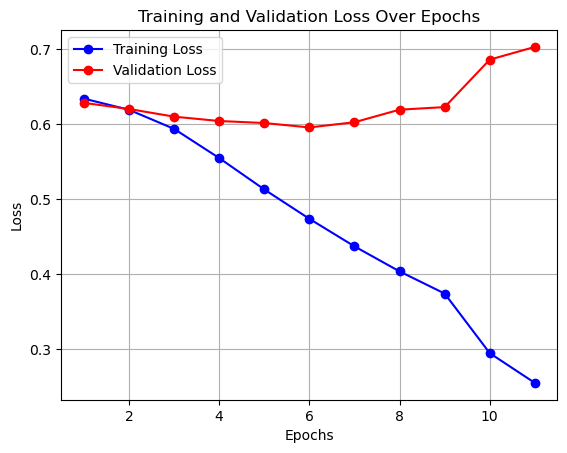

In [81]:
# Plotting the training and validation loss over number of epochs.
import matplotlib.pyplot as plt

# Getting the loss values from training history.
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']  

# Defining the number of epochs.
epochs = range(1, len(loss_values) + 1)

# Creating the plot.
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')  
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss') 
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  
plt.grid(True) 
plt.show()  

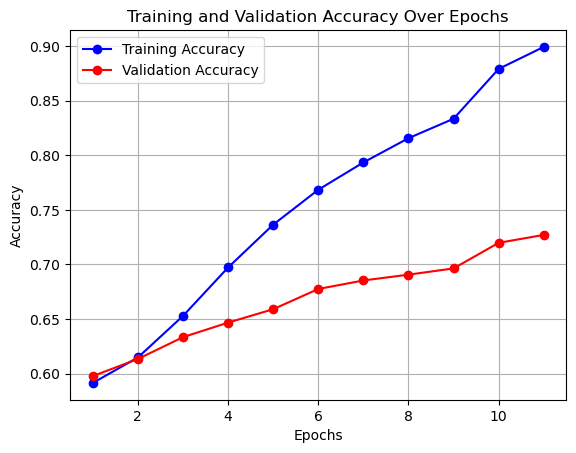

In [82]:
# Plotting the training and validation accuracies over number of epochs.
import matplotlib.pyplot as plt

# Getting the training and validation accuracies from the history.
loss_values = history.history['accuracy']
val_loss_values = history.history['val_accuracy']  

# Getting the number of epochs.
epochs = range(1, len(loss_values) + 1)

# Creating the plot.
plt.plot(epochs, loss_values, 'bo-', label='Training Accuracy')  
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Accuracy') 
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.grid(True)  
plt.show() 

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defing the random forest model.
rf_model = RandomForestClassifier()

# Training the model.
rf_model.fit(X_train, y_train)

# Making predictions.
y_pred = rf.predict(X_test)

# Evaluating model accuracy.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7914475015172971


In [49]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79     19695
         1.0       0.78      0.82      0.80     19849

    accuracy                           0.79     39544
   macro avg       0.79      0.79      0.79     39544
weighted avg       0.79      0.79      0.79     39544



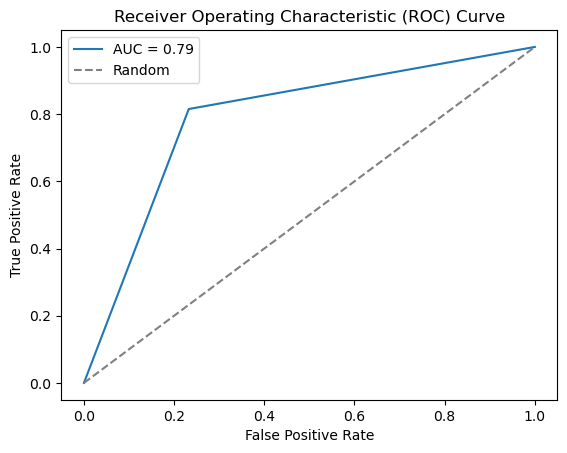

In [50]:
import matplotlib.pyplot as plt

# Defining the ROC curve.
auc = roc_auc_score(y_test, y_pred)

# Computing the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotting the ROC curve.
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
[[15117  4578]
 [ 3669 16180]]


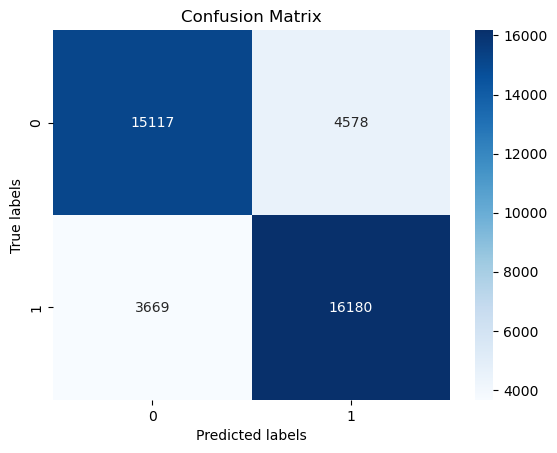

In [51]:
import seaborn as sns
# Computing the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix.
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix.
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# KNN 

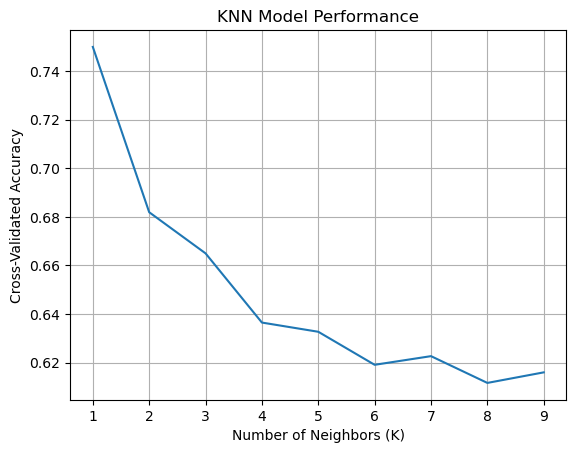

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Defining the range of K values to find out the ideal value of k.
k_values = list(range(1,10))

# Initializing the lists to store cross-validated accuracy scores for each k.
cv_scores = []

# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Performing cross-validation for each value of k.
for k in k_values:
    
    # Defining the KNN classifier.
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fitting KNN classifier on training data.
    knn_classifier.fit(X_train, y_train)

    # Predicting the labels for test data.
    y_pred = knn_classifier.predict(X_test)

    # Calculating the accuracy.
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Plot the cross-validated accuracy scores against values of k.
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Model Performance')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Considering the ideal value of k as 2 since as per the elbow method.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Defing the knn model.
knn_classifier = KNeighborsClassifier(n_neighbors=2, metric='cosine')
    
# Fitting the knn classifier on training data.
knn_classifier.fit(X_train, y_train)

# Predicting the labels for test data.
y_pred = knn_classifier.predict(X_test)

# Calculating the accuracy for test data.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6850849686425248


In [52]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Calculating and printing the classification report.
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71     19695
         1.0       0.72      0.60      0.66     19849

    accuracy                           0.69     39544
   macro avg       0.69      0.69      0.68     39544
weighted avg       0.69      0.69      0.68     39544



We also ran knn classifier for k=3 and metric=cosine

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Calculating and printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.78     19695
         1.0       0.78      0.82      0.80     19849

    accuracy                           0.79     39544
   macro avg       0.79      0.79      0.79     39544
weighted avg       0.79      0.79      0.79     39544



For k=3, metric=euclidean

In [55]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Calculating and printing the classification report.
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.58      0.63     19695
         1.0       0.64      0.75      0.69     19849

    accuracy                           0.66     39544
   macro avg       0.67      0.66      0.66     39544
weighted avg       0.67      0.66      0.66     39544



# Defining test case

Since the random forest gave us the best results till now we will consider it to perform lineup suggestion.

In [52]:
# Reading the data ansd storing it in a variable to lookup for the players based on the input teams.
data_2007 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2007.csv")
data_2008 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2008.csv")
data_2009 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2009.csv")
data_2010 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2010.csv")
data_2011 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2011.csv")
data_2012 =pd.read_csv("C:/Users/Desktop/Project/Dataset/matchups-2012.csv")
df1=pd.concat([data_2007,data_2008,data_2009,data_2010,data_2011,data_2012])

Defining home team, away team and season

In [83]:
away_name_input = input("Enter the AWAY team: ")
home_name_input = input("Enter the HOME team: ")
team_year_input = input("Enter the season: ")
team_year_input=int(team_year_input)

Enter the AWAY team: PHO
Enter the season: 2007
Enter the HOME team: LAL


In [85]:
# Getting the home and away players based of the input teams from the input year.
away_team_data = df1[(df1['away_team'] == away_name_input) & (df1['season'] == team_year_input)]
home_team_data = df1[(df1['home_team'] == home_name_input) & (df1['season'] == team_year_input)]

away_players = away_team_data[['away_1', 'away_2', 'away_3', 'away_0', 'away_4']].values.flatten()
home_players = home_team_data[['home_1', 'home_2', 'home_3', 'home_0', 'home_4']].values.flatten()

# Getting all the unique players for home and away teams.
unique_away_players = pd.unique(away_players)
unique_home_players = pd.unique(home_players)

In [86]:
unique_home_players

array(['Lamar Odom', 'Luke Walton', 'Sasha Vujacic', 'Andrew Bynum',
       'Smush Parker', 'Maurice Evans', 'Ronny Turiaf',
       'Vladimir Radmanovic', 'Brian Cook', 'Jordan Farmar',
       'Kobe Bryant', 'Kwame Brown', 'Shammond Williams', 'Aaron McKie'],
      dtype=object)

In [87]:
unique_away_players

array(['Kurt Thomas', 'Raja Bell', 'Shawn Marion', 'Boris Diaw',
       'Steve Nash', 'Leandro Barbosa', "Amar'e Stoudemire",
       'James Jones', 'Marcus Banks', 'Jalen Rose', 'Pat Burke',
       'Jumaine Jones', 'Sean Marks', 'Eric Piatkowski'], dtype=object)

Defining 5 members for home team and 4 members for away team.

In [88]:
home_team_trial_names=['Andrew Bynum','Lamar Odom','Luke Walton','Sasha Vujacic','Smush Parker']
away_team_trial_names=['Boris Diaw','Kurt Thomas','Raja Bell','Shawn Marion']

In [89]:
# Getting the encoded values for the input players form the respective home and away dictionaries defined earlier.
away_team_trial_enco=[]
home_team_trial_enco=[]

for player in away_team_trial_names:
    away_team_trial_enco.append(away_player_name_mapping.get(player))
    print("Away player name:", player, "Mapped value:", away_player_name_mapping.get(player))

for player in home_team_trial_names:
    home_team_trial_enco.append(home_player_name_mapping.get(player))
    print("Home player name:", player, "Mapped value:", home_player_name_mapping.get(player))

AWAY name: Boris Diaw Mapped name: 80
AWAY name: Kurt Thomas Mapped name: 468
AWAY name: Raja Bell Mapped name: 625
AWAY name: Shawn Marion Mapped name: 699
HOME name: Andrew Bynum Mapped name: 41
HOME name: Lamar Odom Mapped name: 477
HOME name: Luke Walton Mapped name: 506
HOME name: Sasha Vujacic Mapped name: 684
HOME name: Smush Parker Mapped name: 707


In [90]:
# Fetching the embeddings from the encoded values from the home and away dictionaries defined earlier.
away_team_embeddings=[]
home_team_embeddings=[]
for player in away_team_trial_enco:
    away_team_embeddings.append(away_player_weights.get(player))
    print("Away player value:", player, "Embedding:", away_player_weights.get(player))

for player in home_team_trial_enco:
    home_team_embeddings.append(home_player_weights.get(player))
    print("Home player value:", player, "Embedding:", home_player_weights.get(player))

AWAY name: 80 Embedding: [-2.37003028e-01 -1.04911588e-01  1.92695558e-02 -1.44010454e-01
 -6.47594929e-02 -1.82655513e-01  1.88277960e-01 -3.48570272e-02
 -6.23146966e-02  1.89314950e-02  7.19847754e-02 -2.24046729e-04
 -5.07299975e-02  2.37413287e-01 -2.94971578e-02 -4.74888310e-02
  1.75909817e-01 -1.10784106e-01 -1.49716720e-01 -2.04093322e-01
 -5.39578088e-02 -6.11456595e-02  2.94111427e-02 -1.00401670e-01
 -1.61487609e-02  1.17652796e-01  8.31836611e-02 -6.56111389e-02
  1.55881211e-01 -5.58751114e-02  1.27081752e-01  6.30257186e-03]
AWAY name: 468 Embedding: [ 0.1544067   0.11844826  0.12886265  0.0704026  -0.08504894 -0.03681478
 -0.07340414  0.24254379 -0.29428712  0.00691053 -0.40153506 -0.20899725
 -0.08669125  0.25285628 -0.04429595  0.17185897 -0.03451538  0.487076
 -0.07103425 -0.02293866 -0.11985926 -0.02030565 -0.02998027 -0.23375292
  0.03937658  0.02848219 -0.01675211 -0.20107539  0.13369462  0.23056915
  0.23606576  0.04160149]
AWAY name: 625 Embedding: [-0.06249135 

In [91]:
# Getting the remaining players for the away team which can become a part of lineup and getting their encoded values.

# Converting lists to sets
set1 = set(unique_away_players)
set2 = set(away_team_trial_names)

# Removing the common names from both sets.
remaining_players = set1 - set2

# Getting the list of all unique away players.
unique_list = list(remaining_players)
print(unique_list)

['Pat Burke', 'Jalen Rose', 'Steve Nash', 'Sean Marks', 'Marcus Banks', 'Leandro Barbosa', 'Eric Piatkowski', 'Jumaine Jones', "Amar'e Stoudemire", 'James Jones']


In [92]:
# Getting the encoded values for those remaining away players.
lineup_away_team_enco=[]
for player in unique_list:
    lineup_away_team_enco.append(away_player_name_mapping.get(player))
    print("Away player name:", player, "Mapped value:", away_player_name_mapping.get(player))

AWAY name: Pat Burke Mapped name: 604
AWAY name: Jalen Rose Mapped name: 331
AWAY name: Steve Nash Mapped name: 718
AWAY name: Sean Marks Mapped name: 684
AWAY name: Marcus Banks Mapped name: 521
AWAY name: Leandro Barbosa Mapped name: 487
AWAY name: Eric Piatkowski Mapped name: 265
AWAY name: Jumaine Jones Mapped name: 431
AWAY name: Amar'e Stoudemire Mapped name: 25
AWAY name: James Jones Mapped name: 342


In [93]:
# Fetching the embeddings from the encoded values.
lineup_away_team_embeddings=[]

for player in lineup_away_team_enco:
    lineup_away_team_embeddings.append(away_player_weights.get(player))
    print("AWAY name:", player, "Embedding:", away_player_weights.get(player))

AWAY name: 604 Embedding: [-0.28215432 -0.36917573  0.3070592  -0.15809603 -0.16938746 -0.4498226
 -0.1359747  -0.05256361  0.19020522  0.25754824 -0.5351767  -0.39992815
  0.3724555   0.49687335 -0.421058    0.07483598 -0.25567928  0.33982792
  0.10081741  0.04776713 -0.14234272 -0.3088051   0.45483193  0.13194636
  0.04011965 -0.28104183  0.09498354  0.13819137 -0.15100218 -0.57887447
 -0.14545706  0.19426012]
AWAY name: 331 Embedding: [-0.06668761  0.14433736  0.1550117  -0.05528544 -0.22220087 -0.07180735
  0.54030997 -0.1231472   0.02293221  0.0505392  -0.06957458 -0.07522573
  0.0067794  -0.2066233   0.12645884 -0.09282447  0.17667188  0.24083577
  0.1328894  -0.01265773  0.08100118  0.02956853  0.44621274 -0.18920726
 -0.09682719  0.16820434 -0.29286203  0.00481521 -0.04769721 -0.21878661
  0.05957832  0.05021354]
AWAY name: 718 Embedding: [ 0.08368182 -0.01845177  0.06369814 -0.07115319 -0.0663965  -0.08475607
  0.11974507 -0.1271703  -0.25930187 -0.00690163 -0.10096239  0.0467

In [94]:
len(lineup_away_team_embeddings)

10

In [95]:
len(X_flat[0])

320

In [96]:
lineup_away_team_embeddings[0]

array([-0.28215432, -0.36917573,  0.3070592 , -0.15809603, -0.16938746,
       -0.4498226 , -0.1359747 , -0.05256361,  0.19020522,  0.25754824,
       -0.5351767 , -0.39992815,  0.3724555 ,  0.49687335, -0.421058  ,
        0.07483598, -0.25567928,  0.33982792,  0.10081741,  0.04776713,
       -0.14234272, -0.3088051 ,  0.45483193,  0.13194636,  0.04011965,
       -0.28104183,  0.09498354,  0.13819137, -0.15100218, -0.57887447,
       -0.14545706,  0.19426012], dtype=float32)

In [97]:
# Forming the test data by concatenating the embeddings of fixed 5 home players, 4 away players 
# with the different 5th away player that can become a part of lineup.

X_input=[]
i=0
for i in range(0,len(lineup_away_team_embeddings)):
    X_input.append(home_team_embeddings+away_team_embeddings+[lineup_away_team_embeddings[i]])

In [98]:
len(X[4])

10

In [99]:
# Stacking the arrays along axis=1 to make them understandable by neural network.
X_input_flat = np.vstack([np.concatenate(arr) for arr in X_input])

In [100]:
X_input_flat

array([[ 0.18508695, -0.01469436, -0.1910271 , ..., -0.57887447,
        -0.14545706,  0.19426012],
       [ 0.18508695, -0.01469436, -0.1910271 , ..., -0.21878661,
         0.05957832,  0.05021354],
       [ 0.18508695, -0.01469436, -0.1910271 , ..., -0.1433448 ,
        -0.12004369, -0.10465814],
       ...,
       [ 0.18508695, -0.01469436, -0.1910271 , ..., -0.07891987,
         0.3231201 ,  0.2139188 ],
       [ 0.18508695, -0.01469436, -0.1910271 , ..., -0.05783566,
        -0.112813  , -0.02066271],
       [ 0.18508695, -0.01469436, -0.1910271 , ..., -0.25753126,
         0.03506319,  0.38876098]], dtype=float32)

In [101]:
# Feeding the test data into the random forest model to predict the outcome.
y_pred = rf.predict(X_input_flat) 

In [102]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
# Fetching the probabilities with which the random forest predicts win or lose.
y_pred_proba = rf.predict_proba(X_input_flat)

In [104]:
y_pred_proba

array([[0.60166667, 0.39833333],
       [0.62666667, 0.37333333],
       [0.80833333, 0.19166667],
       [0.53833333, 0.46166667],
       [0.63      , 0.37      ],
       [0.645     , 0.355     ],
       [0.67166667, 0.32833333],
       [0.63333333, 0.36666667],
       [0.60666667, 0.39333333],
       [0.67666667, 0.32333333]])

In [105]:
# Finding the indices where the away_team is winning. Here 0 indicates the away team wins.
indices_zero = np.where(y_pred == 0)[0]

In [106]:
# Getting the corresponding encoded values for the 5th player suggesting the win for away team.

# Initializing player_names list
player_names_enco = {}

for indice in indices_zero:
    player_names_enco[lineup_away_team_enco[indice]] = y_pred_proba[indice][0]

In [107]:
# Based on the encoded values of players getting their corresponding names.
for p, prob in player_names_enco.items():

    # Initializing the corresponding key to None.
    corresponding_key = None

    for key, value in away_player_name_mapping.items():
        if value == p:
            corresponding_key = key
            print("Player : ",corresponding_key, "Probability :",prob)
            break

Player :  Pat Burke Probability : 0.6016666666666667
Player :  Jalen Rose Probability : 0.6266666666666666
Player :  Steve Nash Probability : 0.8083333333333335
Player :  Sean Marks Probability : 0.5383333333333333
Player :  Marcus Banks Probability : 0.63
Player :  Leandro Barbosa Probability : 0.645
Player :  Eric Piatkowski Probability : 0.6716666666666665
Player :  Jumaine Jones Probability : 0.6333333333333333
Player :  Amar'e Stoudemire Probability : 0.6066666666666667
Player :  James Jones Probability : 0.6766666666666667


Thus, here the player with the highest winning probability can be chosen as an ideal player for the given lineups.